In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator as op
from functools import reduce

In [2]:
# Applying all mechanisms to 1 dimension

Text(0.5,1,'Pdf of distributions w/ Mean: 0 Scale: 3')

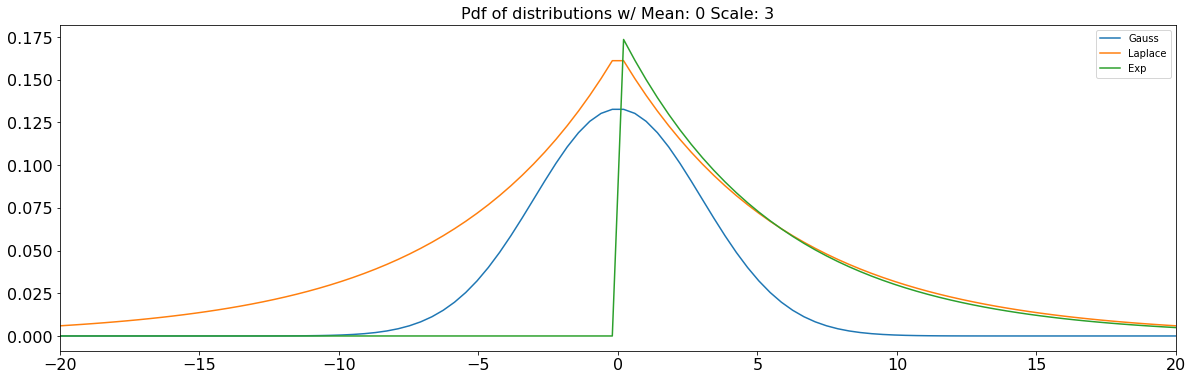

In [3]:
# Cts valued distributions
k = 20
scale = 3
mu = 0 
x = np.linspace(-k, k, 100)

gauss = lambda x : 1/(scale*np.sqrt(2*np.pi))*np.exp(-(x - mu)**2/(2*scale**2))
laplace = lambda x : 1/(2*scale)*np.exp(-abs(x - mu)/(2*scale))

def exponential(_x, _mu):
    
    if _x <= 0:
        return 0
    
    return _mu*np.exp(-_mu*_x)
    

df = pd.DataFrame([[gauss(i) for i in x],
                   [laplace(i) for i in x],
                   [exponential(i, mu+0.18) for i in x],
                  ],
             columns=x, index=['Gauss', 'Laplace', 'Exp'])

ax = df.T.plot(figsize=(20, 6), fontsize=16)
ax.set_title('Pdf of distributions w/ Mean: {} Scale: {}'.format(mu, scale), fontsize=16)

In [6]:
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2
    
    

In [41]:
ks = [i for i in range(10)]
binomial = lambda k, p, n : ncr(n, k)*(p**k)*((1-p)**(n-k))
poisson = lambda k, lam: lam**k*np.exp(-lam)/(reduce(op.mul, range(1, k+1), 1))
neg_bin = lambda k, p, r : ncr(k+r-1, k)*((1-p)**r)*(p**k)
geometric = lambda k, p : ((1-p)**(k-1))*p

The Poisson distribution is actually a limiting case of a Binomial distribution when the number of trials, n, gets very large and p, the probability of success, is small. As a rule of thumb, if n≥100 and np≤10, the Poisson distribution (taking λ=np) can provide a very good approximation to the binomial distribution.

This is particularly useful as calculating the combinations inherent in the probability formula associated with the binomial distribution can become difficult when n is large.

To better see the connection between these two distributions, consider the binomial probability of seeing x successes in n trials, with the aforementioned probability of success, p, as shown below.

[Source](http://mathcenter.oxford.emory.edu/site/math117/connectingPoissonAndBinomial/)

np= 5.0
neg binomial mean:  5.2631578947368425


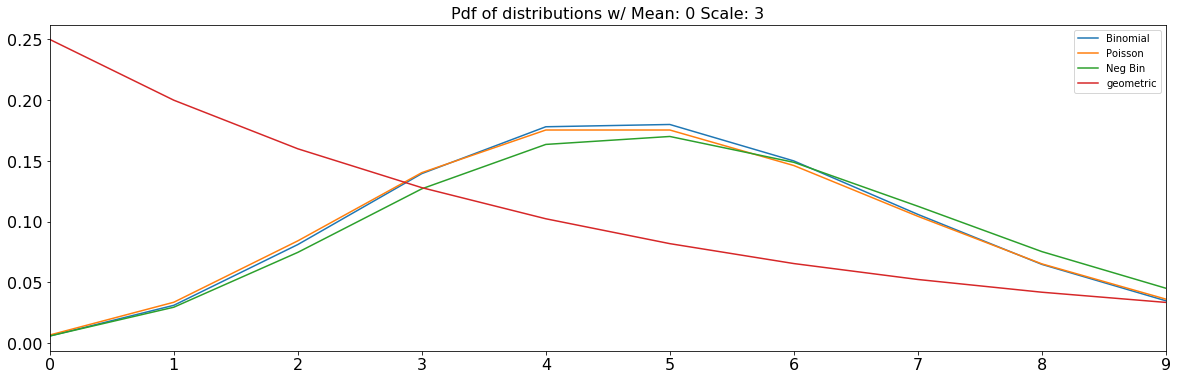

In [43]:
n = 100 # 100 tosses k successes
p = 0.05
r = 100 # Number of successes till r failures
print('np=', n*p)
lam = n*p
print('neg binomial mean: ', p*r/(1-p))
df = pd.DataFrame([
                   [binomial(i, p, n) for i in ks],
                   [poisson(i, lam) for i in ks],
                   [neg_bin(i, p, r) for i in ks],
                  [geometric(i, 0.2) for i in ks],
                  ],
                 columns=ks, index=['Binomial', 'Poisson', 'Neg Bin', 'geometric'])
ax = df.T.plot(figsize=(20, 6), fontsize=16)
ax.set_title('Pdf of distributions w/ Mean: {} Scale: {}'.format(mu, scale), fontsize=16);

In [44]:
1/0.2

5.0